In [14]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [15]:
from pandas import read_csv
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pickle as pik
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
dat=open('data.pkl','rb')
dataframe=pik.load(dat)

In [32]:
dat = pik.load(open('data.pkl', 'rb'))

In [33]:
dat

array([[ 0.00000000e+00,  2.00000000e+00],
       [ 1.00000000e-03,  2.02599961e+00],
       [ 2.00000000e-03,  2.05199691e+00],
       ...,
       [ 4.99700000e+00, -2.19781538e+01],
       [ 4.99800000e+00, -2.19609488e+01],
       [ 4.99900000e+00, -2.19436572e+01]])

In [35]:
X, y = dat[:, :-1], dat[:, -1]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [37]:
x_trainfolds=np.array_split(X_train,10)
y_trainfolds=np.array_split(y_train,10)

In [38]:
model = LinearRegression()

In [41]:
result=[]
for i in range(10):
    mse, bias, var = bias_variance_decomp(model, x_trainfolds[i], y_trainfolds[i], X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
    result.append((mse, bias, var))

In [44]:
result

[(30.581683893753226, 30.44450048418883, 0.13718340956439312),
 (30.584716880531964, 30.44483792965373, 0.13987895087823382),
 (30.80248619078827, 30.68183214264732, 0.12065404814094878),
 (30.6343458451875, 30.467521781151955, 0.166824064035543),
 (30.6517544154002, 30.491742464981115, 0.16001195041908386),
 (30.541456546244454, 30.39103724557819, 0.15041930066626738),
 (30.635636599108746, 30.473533609592774, 0.16210298951597402),
 (31.011931315369328, 30.863083896471384, 0.14884741889794198),
 (30.657201766315865, 30.518251323983357, 0.1389504423325128),
 (30.538795422317197, 30.391457378720446, 0.14733804359675254)]

In [65]:
sum_mse=0
sum_bias=0
sum_var=0
for i in range(10):
    sum_mse+=result[i][0]
    sum_bias+=result[i][1]
    sum_var+=result[i][2]
    
sum_mse   

306.64000887501675

In [68]:
sum_bias

305.16779825696915

In [69]:
sum_var

1.4722106180476515

In [70]:
x_trainfolds

[array([[3.15 ],
        [4.633],
        [1.783],
        [2.541],
        [2.928],
        [1.768],
        [3.697],
        [1.577],
        [1.652],
        [2.024],
        [4.3  ],
        [3.581],
        [1.561],
        [3.919],
        [1.499],
        [1.703],
        [4.006],
        [4.554],
        [3.72 ],
        [2.351],
        [0.771],
        [0.324],
        [0.858],
        [4.024],
        [3.266],
        [0.09 ],
        [1.073],
        [2.243],
        [0.094],
        [2.887],
        [0.157],
        [2.106],
        [4.818],
        [0.899],
        [0.761],
        [4.882],
        [2.685],
        [2.506],
        [2.088],
        [3.664],
        [0.678],
        [0.779],
        [2.831],
        [1.973],
        [1.875],
        [1.637],
        [0.23 ],
        [3.509],
        [1.169],
        [0.965],
        [1.823],
        [2.6  ],
        [1.042],
        [1.352],
        [3.183],
        [1.476],
        [3.573],
        [3.642],
        [3.023

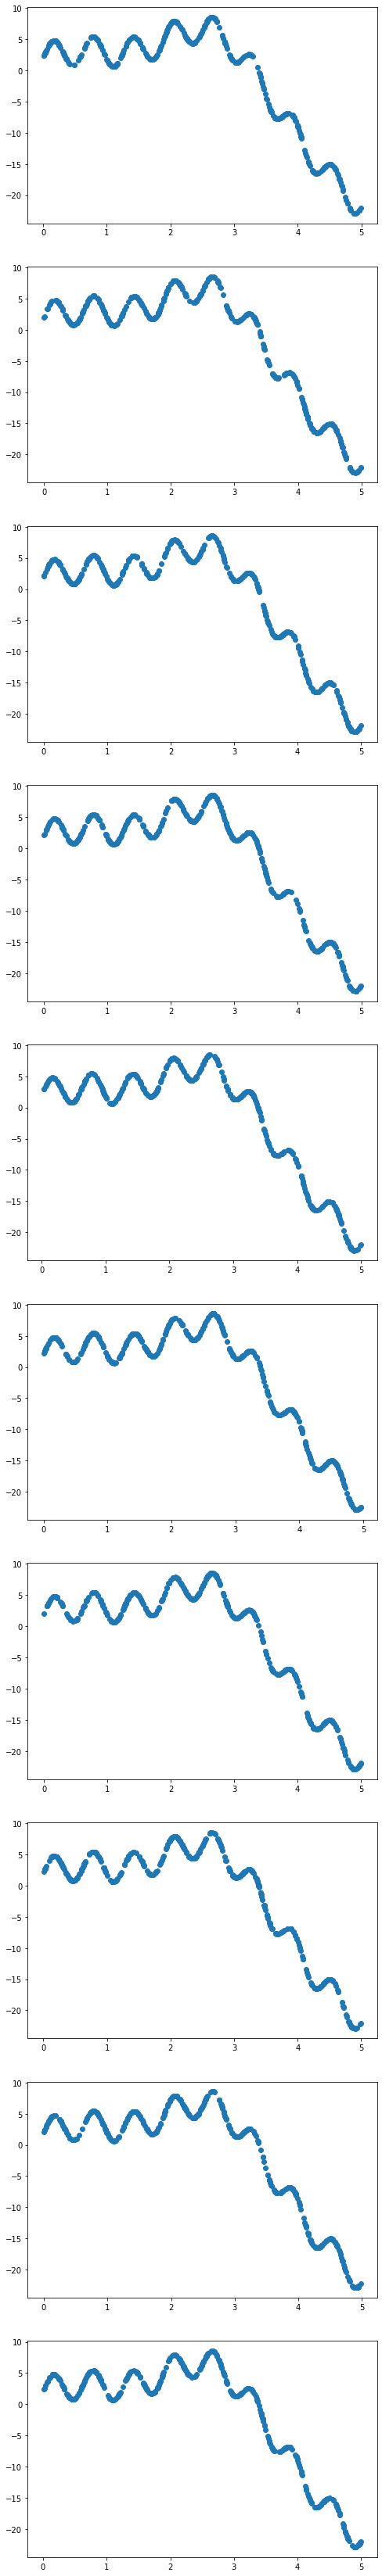

In [71]:
fig, axs=plt.subplots(10,figsize=(8,60))
for i in range(10):
    axs[i].scatter(x_trainfolds[i][:],y_trainfolds[i][:])
    

In [72]:
new_trainx=[]
polynomial_feature = PolynomialFeatures(2)
model = LinearRegression()
predect_values = []
new_x_test = polynomial_feature.fit_transform(X_test.reshape(-1,1))
for i in range(10):
    new_trainx.append(polynomial_feature.fit_transform(x_trainfolds[i][:]))
    model.fit(new_trainx[i],y_trainfolds[i])
    predect_values.append(model.predict(new_x_test))

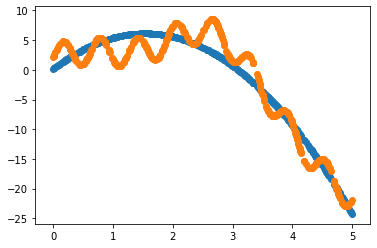

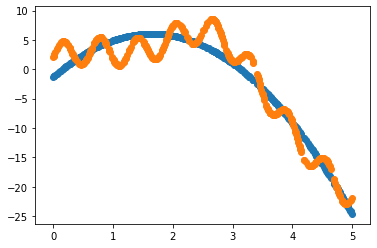

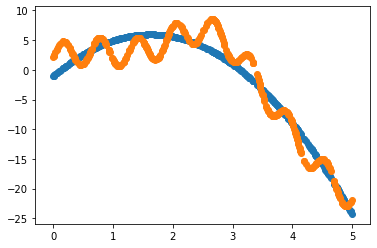

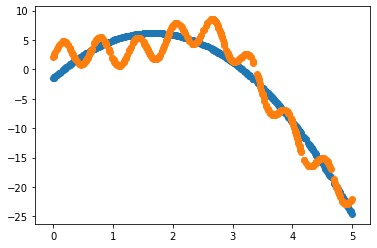

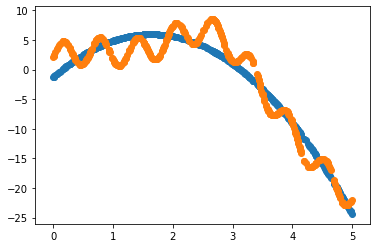

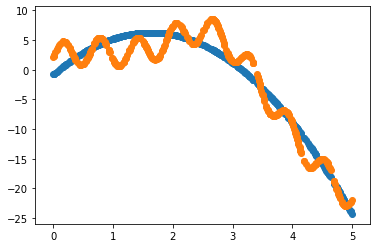

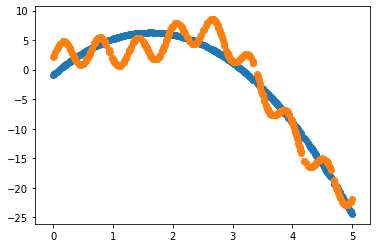

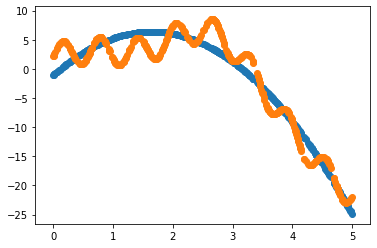

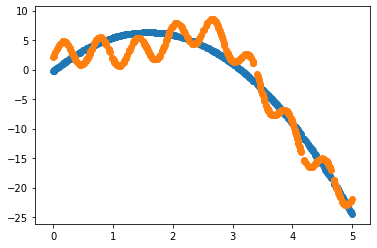

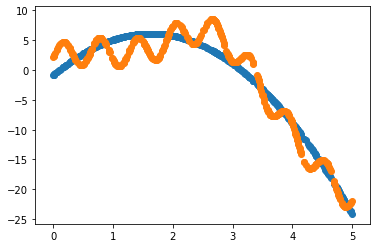

In [73]:
for i in range(10):
         plt.scatter(X_test,predect_values[i])
         plt.scatter(X_test,y_test)
         plt.show()

In [74]:
for i in range(10):
    mse, bias, var = bias_variance_decomp(model, x_trainfolds[i], y_trainfolds[i], X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
    result.append((mse,bias,var))

In [75]:
result2 = []
for i in range(10):
    mse, bias, var = bias_variance_decomp(model,new_trainx[i],y_trainfolds[i],new_x_test,y_test, loss='mse', num_rounds=200, random_seed=1)
    result2.append((mse, bias, var))

In [76]:
result2

[(6.507028286504026, 6.4738893129774535, 0.03313897352657266),
 (6.37187754100566, 6.331654745798317, 0.04022279520734388),
 (6.375508227824001, 6.336269404661931, 0.039238823162070925),
 (6.402588090863411, 6.3582788558235, 0.04430923503991143),
 (6.385170899386699, 6.342263662297027, 0.04290723708967212),
 (6.39435519105808, 6.355810003638524, 0.038545187419556176),
 (6.39048202442212, 6.34416663171574, 0.046315392706379674),
 (6.398210921503128, 6.361800362743363, 0.036410558759764),
 (6.424292643058431, 6.389135698778553, 0.03515694427987734),
 (6.387393131213722, 6.344721226524794, 0.0426719046889289)]

In [77]:
sum_mse2=0
sum_bias2=0
sum_var2=0
for i in range(10):
    sum_mse2+=result2[i][0]
    sum_bias2+=result2[i][1]
    sum_var2+=result2[i][2]
    
sum_mse2 


64.03690695683929

In [78]:
sum_bias2


63.637989904959205

In [79]:
sum_var2

0.3989170518800771

In [80]:
new_trainx=[]
polynomial_feature = PolynomialFeatures(3)
model = LinearRegression()
predect_values = []
new_x_test = polynomial_feature.fit_transform(X_test.reshape(-1,1))
for i in range(10):
    new_trainx.append(polynomial_feature.fit_transform(x_trainfolds[i][:]))
    model.fit(new_trainx[i],y_trainfolds[i])
    predect_values.append(model.predict(new_x_test))

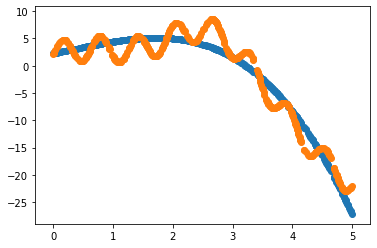

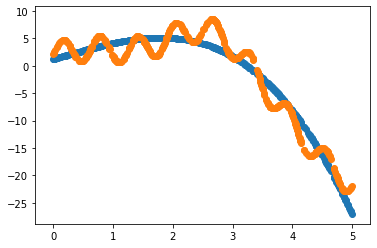

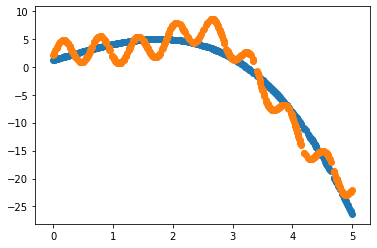

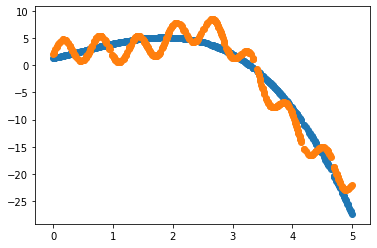

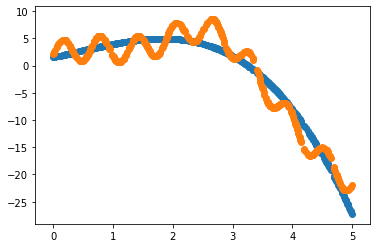

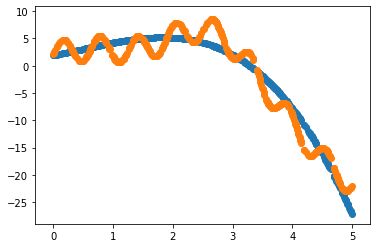

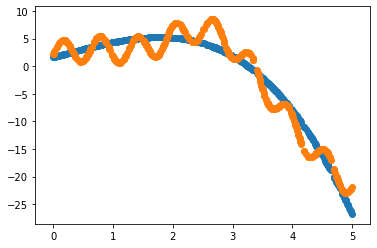

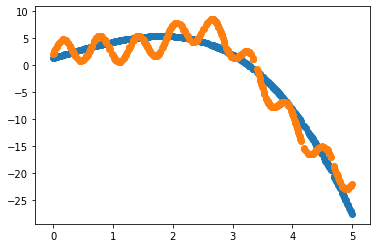

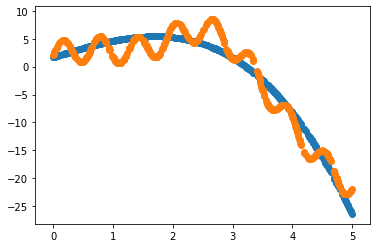

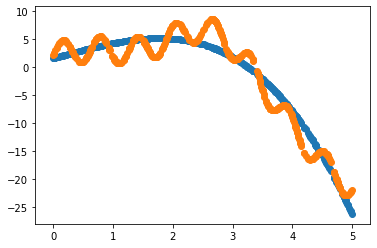

In [81]:
for i in range(10):
         plt.scatter(X_test,predect_values[i])
         plt.scatter(X_test,y_test)
         plt.show()

In [82]:
result3 = []
for i in range(10):
    mse, bias, var = bias_variance_decomp(model,new_trainx[i],y_trainfolds[i],new_x_test,y_test, loss='mse', num_rounds=200, random_seed=1)
    result3.append((mse, bias, var))

In [83]:
result3

[(5.548934816657985, 5.501819905163836, 0.047114911494147885),
 (5.509656368572577, 5.46097020123894, 0.048686167333635504),
 (5.548966241142759, 5.501334920205534, 0.04763132093722786),
 (5.5715321469915695, 5.517955749635816, 0.05357639735575206),
 (5.528812946167002, 5.484368879497269, 0.044444066669733835),
 (5.548012454037207, 5.509488282247432, 0.038524171789773846),
 (5.522446010526533, 5.469864256663494, 0.052581753863037956),
 (5.547842692123322, 5.500079939668709, 0.04776275245461305),
 (5.551204326098198, 5.510708054644087, 0.04049627145411141),
 (5.5542162861458975, 5.506662288732924, 0.04755399741297395)]

In [84]:
sum_mse3=0
sum_bias3=0
sum_var3=0
for i in range(10):
    sum_mse3+=result3[i][0]
    sum_bias3+=result3[i][1]
    sum_var3+=result3[i][2]
    
sum_mse3

55.43162428846305

In [86]:
sum_bias3

54.963252477698035

In [87]:
sum_var3

0.46837181076500733

In [88]:
new_trainx=[]
polynomial_feature = PolynomialFeatures(4)
model = LinearRegression()
predect_values = []
new_x_test = polynomial_feature.fit_transform(X_test.reshape(-1,1))
for i in range(10):
    new_trainx.append(polynomial_feature.fit_transform(x_trainfolds[i][:]))
    model.fit(new_trainx[i],y_trainfolds[i])
    predect_values.append(model.predict(new_x_test))

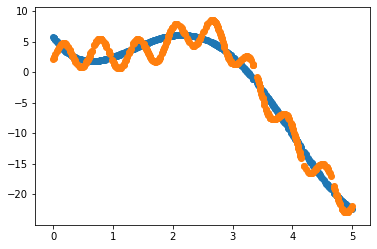

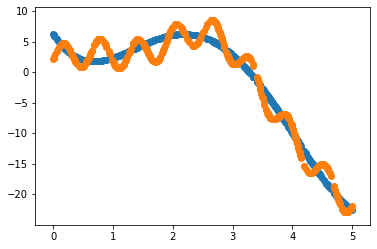

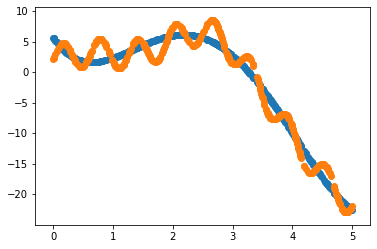

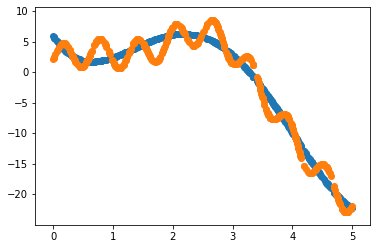

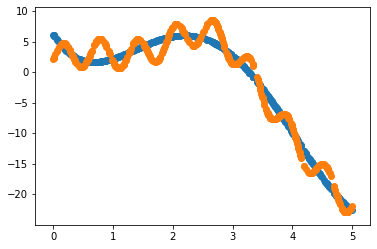

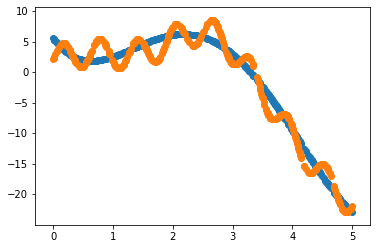

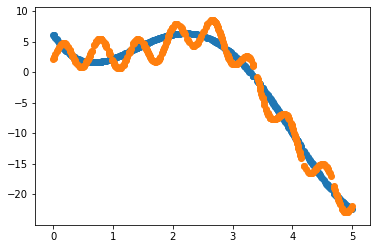

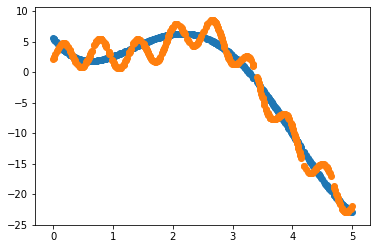

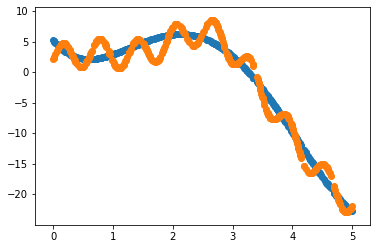

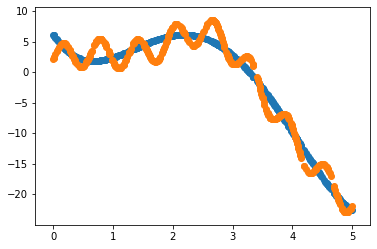

In [89]:
for i in range(10):
         plt.scatter(X_test,predect_values[i])
         plt.scatter(X_test,y_test)
         plt.show()

In [90]:
result4 = []
for i in range(10):
    mse, bias, var = bias_variance_decomp(model,new_trainx[i],y_trainfolds[i],new_x_test,y_test, loss='mse', num_rounds=200, random_seed=1)
    result4.append((mse, bias, var))
result4  

[(3.4103288510112035, 3.3795561173281596, 0.030772733683043643),
 (3.3859068303365607, 3.3492618183561094, 0.036645011980452176),
 (3.3956972415189686, 3.3610582967018123, 0.03463894481715692),
 (3.3920348407102527, 3.354851627171456, 0.037183213538796),
 (3.4201184431338847, 3.3898482743784344, 0.0302701687554502),
 (3.4246396291508483, 3.391628979300886, 0.033010649849963),
 (3.3973859820022905, 3.363384819133316, 0.034001162868972194),
 (3.3804566731535357, 3.3478142711488017, 0.03264240200473403),
 (3.412631915952572, 3.3824614485562634, 0.03017046739630965),
 (3.393766206104009, 3.35944115430843, 0.034325051795579986)]

In [95]:
sum_mse4=0
sum_bias4=0
sum_var4=0
for i in range(10):
    sum_mse4+=result4[i][0]
    sum_bias4+=result4[i][1]
    sum_var4+=result4[i][2]
    
sum_mse4


34.01296661307413

In [96]:
sum_bias4

33.67930680638367

In [97]:
sum_var4

0.33365980669045775

In [98]:
new_trainx=[]
polynomial_feature = PolynomialFeatures(5)
model = LinearRegression()
predect_values = []
new_x_test = polynomial_feature.fit_transform(X_test.reshape(-1,1))
for i in range(10):
    new_trainx.append(polynomial_feature.fit_transform(x_trainfolds[i][:]))
    model.fit(new_trainx[i],y_trainfolds[i])
    predect_values.append(model.predict(new_x_test))

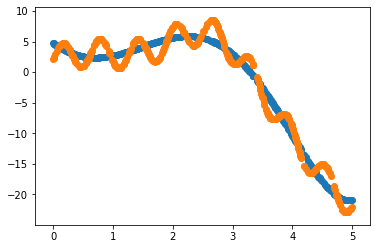

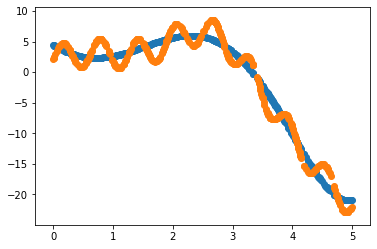

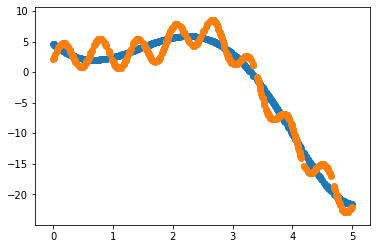

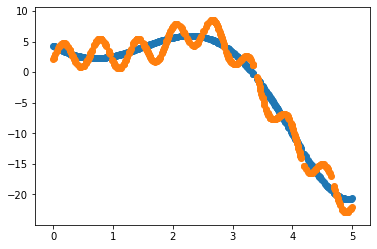

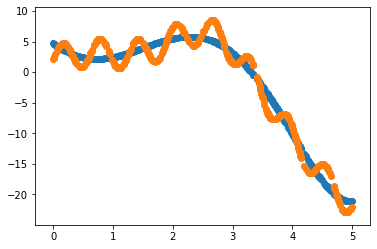

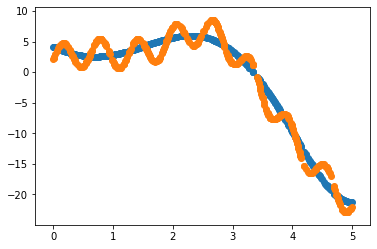

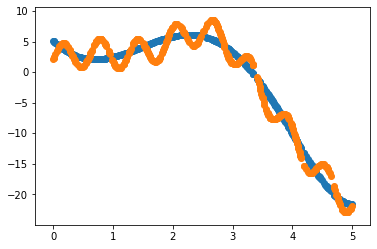

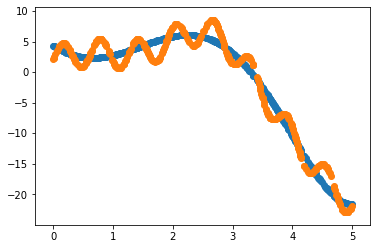

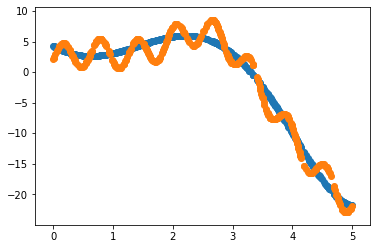

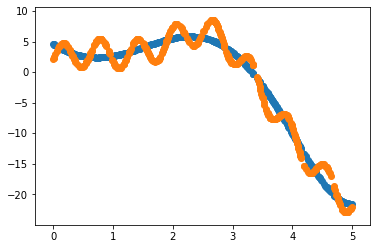

In [99]:
for i in range(10):
         plt.scatter(X_test,predect_values[i])
         plt.scatter(X_test,y_test)
         plt.show()

In [100]:
result5 = []
for i in range(10):
    mse, bias, var = bias_variance_decomp(model,new_trainx[i],y_trainfolds[i],new_x_test,y_test, loss='mse', num_rounds=200, random_seed=1)
    result5.append((mse, bias, var))
result5  

[(3.202788831633108, 3.162171188807912, 0.040617642825196816),
 (3.173619414688355, 3.131886185840301, 0.041733228848053035),
 (3.211147536222536, 3.1715549774432206, 0.03959255877931473),
 (3.2043394736966935, 3.1577974192385243, 0.04654205445816961),
 (3.2120433930809753, 3.171970273222754, 0.04007311985822049),
 (3.218132151357186, 3.1804244106240804, 0.037707740733106364),
 (3.194742031679715, 3.15669212193699, 0.03804990974272487),
 (3.1739942273510904, 3.1360607942543637, 0.03793343309672829),
 (3.2097479201796055, 3.1738429528605527, 0.03590496731905276),
 (3.1694720882320873, 3.130857748371741, 0.038614339860346215)]

In [101]:
sum_mse5=0
sum_bias5=0
sum_var5=0
for i in range(10):
    sum_mse5+=result5[i][0]
    sum_bias5+=result5[i][1]
    sum_var5+=result5[i][2]
sum_mse5    

31.970027068121354

In [102]:
sum_bias5

31.573258072600442

In [103]:
sum_var5

0.3967689955209132

In [104]:
new_trainx=[]
polynomial_feature = PolynomialFeatures(6)
model = LinearRegression()
predect_values = []
new_x_test = polynomial_feature.fit_transform(X_test.reshape(-1,1))
for i in range(10):
    new_trainx.append(polynomial_feature.fit_transform(x_trainfolds[i][:]))
    model.fit(new_trainx[i],y_trainfolds[i])
    predect_values.append(model.predict(new_x_test))

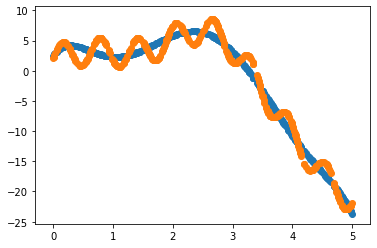

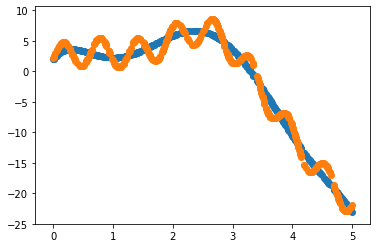

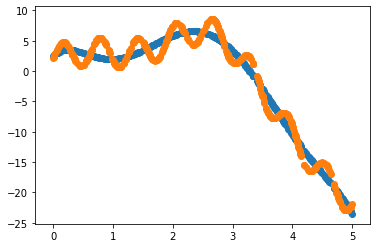

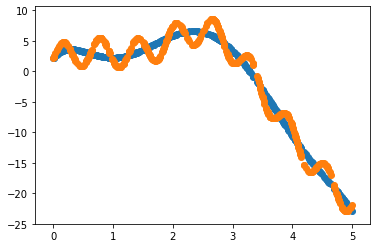

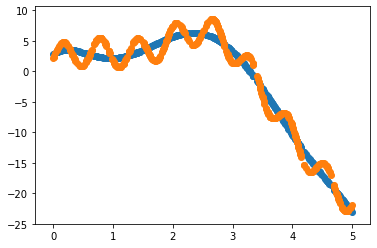

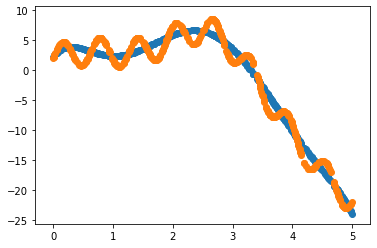

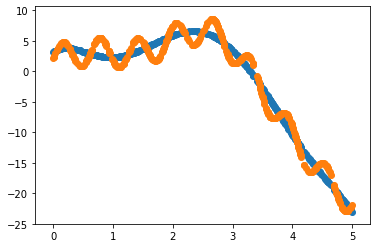

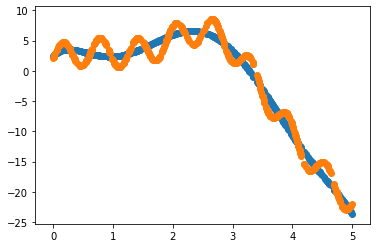

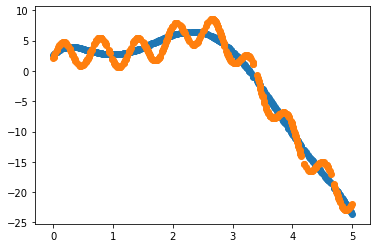

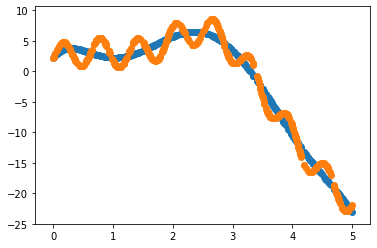

In [105]:
for i in range(10):
         plt.scatter(X_test,predect_values[i])
         plt.scatter(X_test,y_test)
         plt.show()

In [106]:
result6 = []
for i in range(10):
    mse, bias, var = bias_variance_decomp(model,new_trainx[i],y_trainfolds[i],new_x_test,y_test, loss='mse', num_rounds=200, random_seed=1)
    result6.append((mse, bias, var))
result6

[(2.6925388370917234, 2.6571604061297123, 0.03537843096201063),
 (2.6800991092113806, 2.642800310081387, 0.03729879912999415),
 (2.718444168142665, 2.6808605504967664, 0.03758361764589843),
 (2.6908943874109297, 2.6523877013250505, 0.03850668608588047),
 (2.7520529871966573, 2.713769659592019, 0.03828332760463986),
 (2.6799809606848624, 2.645767368256346, 0.03421359242851613),
 (2.6956750519753117, 2.6583232278784257, 0.03735182409688668),
 (2.697979802734098, 2.6602325678830767, 0.037747234851021404),
 (2.698245496782244, 2.6641827470370165, 0.034062749745227404),
 (2.6830014766918078, 2.6465579472508125, 0.03644352944099507)]

In [107]:
sum_mse6=0
sum_bias6=0
sum_var6=0
for i in range(10):
    sum_mse6+=result6[i][0]
    sum_bias6+=result6[i][1]
    sum_var6+=result6[i][2]
sum_mse6    

26.988912277921678

In [108]:
sum_bias6

26.622042485930617

In [109]:
sum_var6

0.36686979199107017

In [110]:
new_trainx=[]
polynomial_feature = PolynomialFeatures(7)
model = LinearRegression()
predect_values = []
new_x_test = polynomial_feature.fit_transform(X_test.reshape(-1,1))
for i in range(10):
    new_trainx.append(polynomial_feature.fit_transform(x_trainfolds[i][:]))
    model.fit(new_trainx[i],y_trainfolds[i])
    predect_values.append(model.predict(new_x_test))

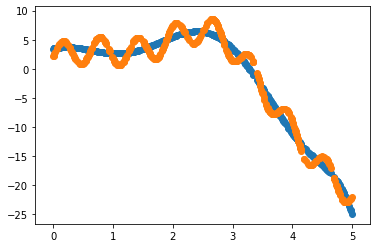

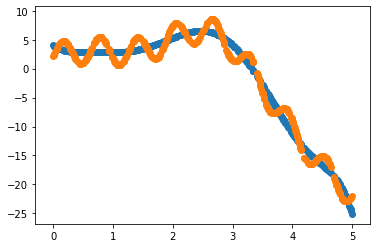

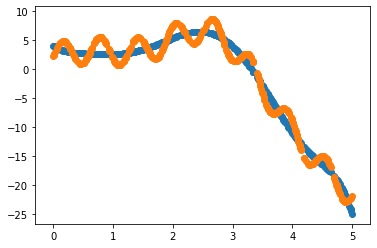

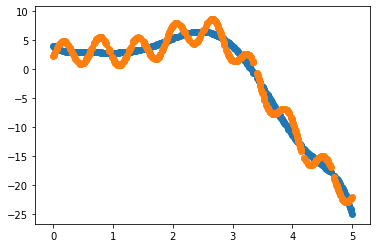

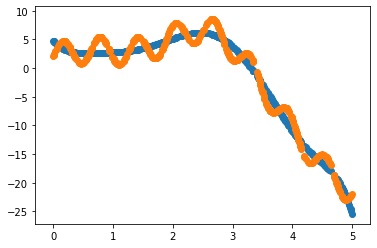

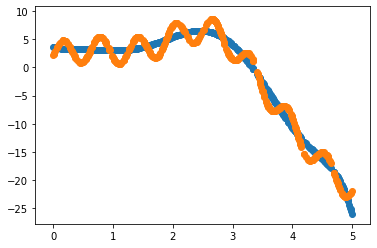

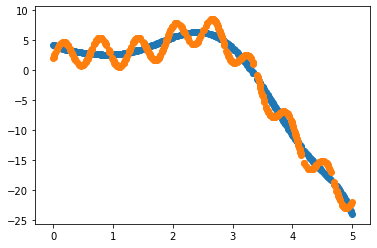

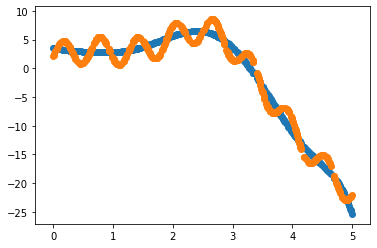

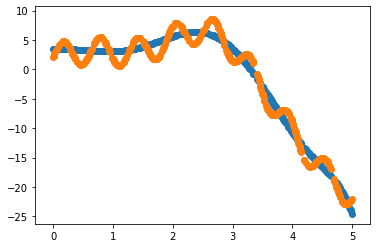

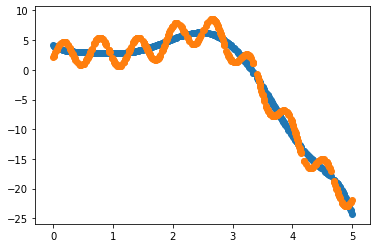

In [111]:
for i in range(10):
         plt.scatter(X_test,predect_values[i])
         plt.scatter(X_test,y_test)
         plt.show()

In [112]:
result7 = []
for i in range(10):
    mse, bias, var = bias_variance_decomp(model,new_trainx[i],y_trainfolds[i],new_x_test,y_test, loss='mse', num_rounds=200, random_seed=1)
    result7.append((mse, bias, var))
result7

[(2.5931182727637894, 2.5488693355867023, 0.044248937177086584),
 (2.608167763644514, 2.557173253862049, 0.050994509782467494),
 (2.6255093285338256, 2.5813496641521896, 0.04415966438163541),
 (2.633177605687077, 2.586611557257708, 0.04656604842937012),
 (2.6682972818915722, 2.6190399538204177, 0.049257328071154655),
 (2.594435044731689, 2.5544116778182984, 0.0400233669133911),
 (2.6220167018844336, 2.576481597884751, 0.045535103999683926),
 (2.6073545157821125, 2.5530005289860593, 0.054353986796051815),
 (2.597802211032523, 2.559432020446, 0.0383701905865227),
 (2.611401009009062, 2.571597059647074, 0.039803949361988694)]

In [113]:
sum_mse7=0
sum_bias7=0
sum_var7=0
for i in range(10):
    sum_mse7+=result7[i][0]
    sum_bias7+=result7[i][1]
    sum_var7+=result7[i][2]
sum_mse7    

26.161279734960598

In [114]:
sum_bias7

25.70796664946125

In [115]:
sum_var7

0.45331308549935245

In [116]:
new_trainx=[]
polynomial_feature = PolynomialFeatures(8)
model = LinearRegression()
predect_values = []
new_x_test = polynomial_feature.fit_transform(X_test.reshape(-1,1))
for i in range(10):
    new_trainx.append(polynomial_feature.fit_transform(x_trainfolds[i][:]))
    model.fit(new_trainx[i],y_trainfolds[i])
    predect_values.append(model.predict(new_x_test))

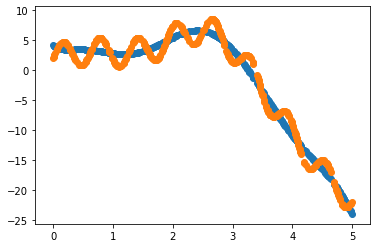

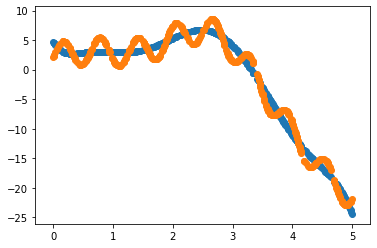

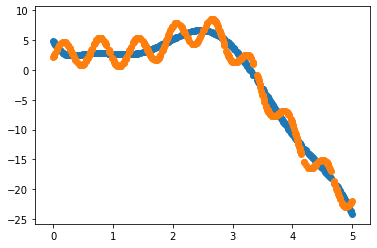

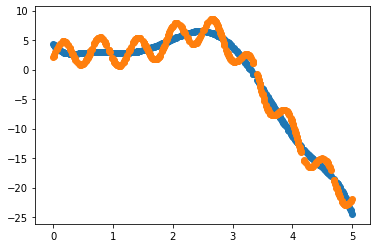

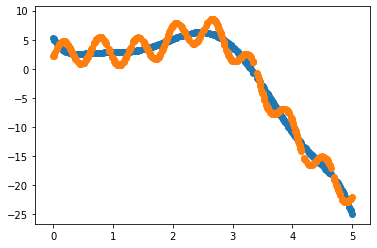

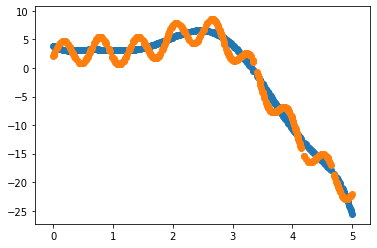

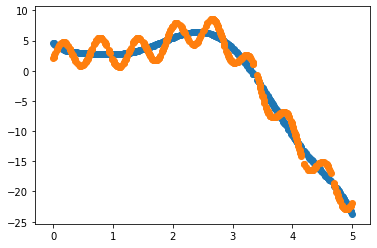

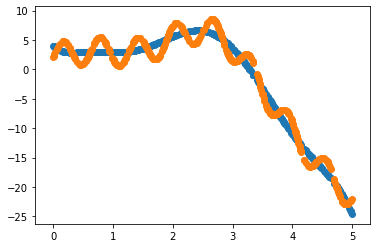

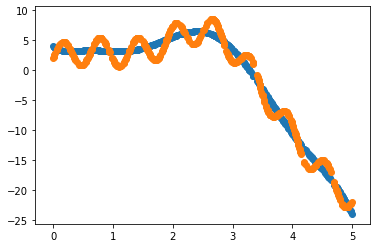

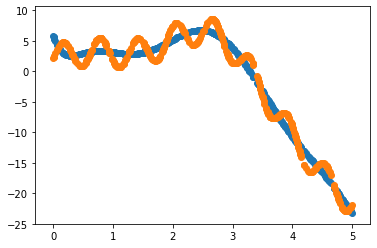

In [117]:
for i in range(10):
         plt.scatter(X_test,predect_values[i])
         plt.scatter(X_test,y_test)
         plt.show()

In [118]:
result8 = []
for i in range(10):
    mse, bias, var = bias_variance_decomp(model,new_trainx[i],y_trainfolds[i],new_x_test,y_test, loss='mse', num_rounds=200, random_seed=1)
    result8.append((mse, bias, var))
result8

[(2.5352841638208945, 2.4884910405976726, 0.04679312322322057),
 (2.575556356460457, 2.5090881317559677, 0.06646822470449218),
 (2.579730044493973, 2.525332620114438, 0.054397424379534966),
 (2.5980186622909356, 2.543792766583918, 0.05422589570701797),
 (2.648409051937814, 2.5889028224735426, 0.05950622946427111),
 (2.562622722106079, 2.516979417753767, 0.04564330435231135),
 (2.600136412494288, 2.5444112568055166, 0.05572515568877272),
 (2.554202714076973, 2.4927072356274294, 0.06149547844954152),
 (2.5401910614460173, 2.4958066102115843, 0.04438445123443309),
 (2.578163113599894, 2.5272855076831435, 0.05087760591675054)]

In [119]:
sum_mse8=0
sum_bias8=0
sum_var8=0
for i in range(10):
    sum_mse8+=result8[i][0]
    sum_bias8+=result8[i][1]
    sum_var8+=result8[i][2]
sum_mse8    

25.772314302727324

In [120]:
sum_bias8

25.232797409606977

In [121]:
sum_var8

0.539516893120346

In [122]:
new_trainx=[]
polynomial_feature = PolynomialFeatures(9)
model = LinearRegression()
predect_values = []
new_x_test = polynomial_feature.fit_transform(X_test.reshape(-1,1))
for i in range(10):
    new_trainx.append(polynomial_feature.fit_transform(x_trainfolds[i][:]))
    model.fit(new_trainx[i],y_trainfolds[i])
    predect_values.append(model.predict(new_x_test))

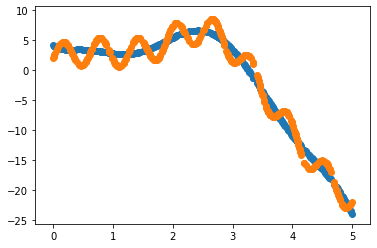

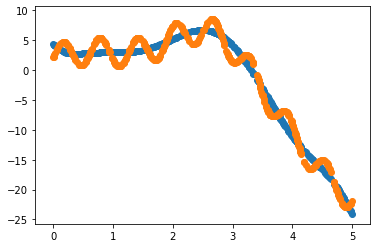

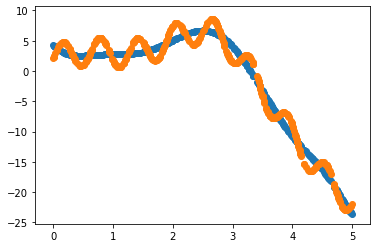

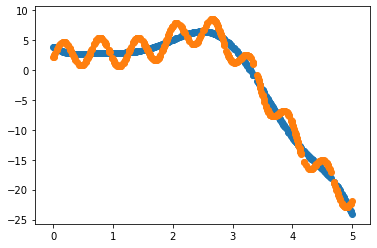

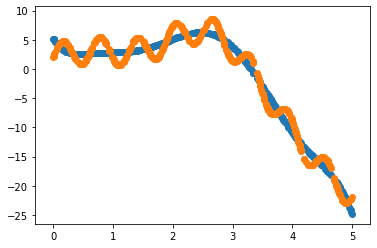

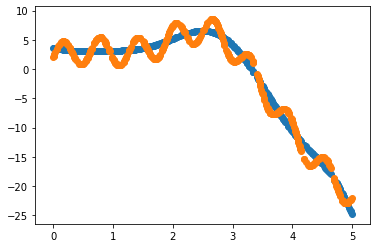

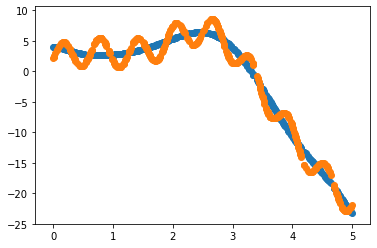

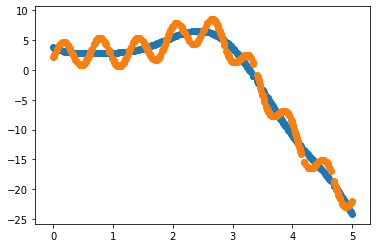

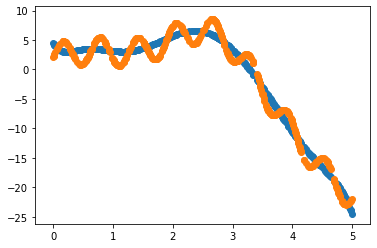

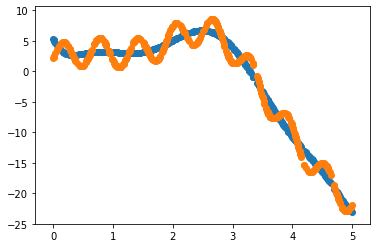

In [123]:
for i in range(10):
         plt.scatter(X_test,predect_values[i])
         plt.scatter(X_test,y_test)
         plt.show()

In [124]:
result9 = []
for i in range(10):
    mse, bias, var = bias_variance_decomp(model,new_trainx[i],y_trainfolds[i],new_x_test,y_test, loss='mse', num_rounds=200, random_seed=1)
    result9.append((mse, bias, var))
result9

[(2.5439613718363905, 2.4877903304469653, 0.056171041389424144),
 (2.5641018737053956, 2.4884450947955075, 0.07565677890989153),
 (2.5430592328476416, 2.483603331203428, 0.05945590164421452),
 (2.575636906791591, 2.517123475902772, 0.05851343088881953),
 (2.669405687744208, 2.593886151151392, 0.07551953659281596),
 (2.5242025398988566, 2.474407205924693, 0.04979533397416257),
 (2.5672689313288823, 2.50731272997657, 0.05995620135231231),
 (2.5462431702509805, 2.4734414698675575, 0.07280170038342162),
 (2.623753575526123, 2.5702245586952497, 0.05352901683087386),
 (2.5517824195133323, 2.4928922345229845, 0.05889018499034851)]

In [125]:
sum_mse9=0
sum_bias9=0
sum_var9=0
for i in range(10):
    sum_mse9+=result9[i][0]
    sum_bias9+=result9[i][1]
    sum_var9+=result9[i][2]
sum_mse9    

25.7094157094434

In [126]:
sum_bias9

25.08912658248712

In [127]:
sum_var9

0.6202891269562846